# Homework 5, Part 2: Answer questions with pandas

**Use the Excel file to answer the following questions.** This is a little more typical of what your data exploration will look like with pandas.

## 0) Setup

Import pandas **with the correct name** and set `matplotlib` to always display graphics in the notebook.

In [1]:
import pandas as pd
%matplotlib inline

## 1) Reading in an Excel file

Use pandas to read in the `richpeople.xlsx` Excel file, saving it as a variable with the name we'll always use for a dataframe.

> **TIP:** You will use `read_excel` instead of `read_csv`, *but you'll also need to install a new library*. You might need to restart your kernel afterward!

In [3]:
# NB I did have to pip install xlrd.
df = pd.read_excel("richpeople.xlsx")

## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [5]:
df.shape

(1653, 30)

In [6]:
df.dtypes

year                         int64
name                        object
rank                         int64
citizenship                 object
countrycode                 object
networthusbillion          float64
selfmade                    object
typeofwealth                object
gender                      object
age                        float64
industry                    object
IndustryAggregates          object
region                      object
north                        int64
politicalconnection        float64
founder                      int64
generationofinheritance     object
sector                      object
company                     object
companytype                 object
relationshiptocompany       object
foundingdate               float64
gdpcurrentus               float64
sourceofwealth              object
notes                       object
notes2                      object
source                      object
source_2                    object
source_3            

## 3) Who are the top 10 richest billionaires? Use the `networthusbillion` column.

In [7]:
df.sort_values(by="networthusbillion", ascending=False).head(10)

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
184,2014,Bill Gates,1,United States,USA,76.0,self-made,founder non-finance,male,58.0,...,founder,1975.0,NaN,Microsoft,NaN,NaN,http://www.forbes.com/profile/bill-gates/,NaN,NaN,NaN
226,2014,Carlos Slim Helu,2,Mexico,MEX,72.0,self-made,privatized and resources,male,74.0,...,founder,1990.0,NaN,telecom,NaN,NaN,http://www.ozy.com/provocateurs/carlos-slims-w...,NaN,NaN,NaN
79,2014,Amancio Ortega,3,Spain,ESP,64.0,self-made,founder non-finance,male,77.0,...,founder,1975.0,NaN,retail,NaN,NaN,http://www.forbes.com/profile/amancio-ortega/,NaN,NaN,NaN
1562,2014,Warren Buffett,4,United States,USA,58.2,self-made,founder non-finance,male,83.0,...,founder,1839.0,NaN,Berkshire Hathaway,NaN,NaN,http://www.forbes.com/lists/2009/10/billionair...,http://www.forbes.com/companies/berkshire-hath...,NaN,NaN
862,2014,Larry Ellison,5,United States,USA,48.0,self-made,founder non-finance,male,69.0,...,founder,1977.0,NaN,Oracle,NaN,NaN,http://www.forbes.com/profile/larry-ellison/,http://www.businessinsider.com/how-larry-ellis...,NaN,NaN
339,2014,David Koch,6,United States,USA,40.0,inherited,inherited,male,73.0,...,relation,1940.0,NaN,diversified,inherited from father,NaN,http://www.kochind.com/About_Koch/History_Time...,NaN,NaN,NaN
247,2014,Charles Koch,6,United States,USA,40.0,inherited,inherited,male,78.0,...,relation,1940.0,NaN,diversified,inherited from father,NaN,http://www.kochind.com/About_Koch/History_Time...,NaN,NaN,NaN
1364,2014,Sheldon Adelson,8,United States,USA,38.0,self-made,self-made finance,male,80.0,...,founder,1952.0,NaN,casinos,NaN,NaN,http://www.forbes.com/profile/sheldon-adelson/,http://lasvegassun.com/news/1996/nov/26/rat-pa...,NaN,NaN
280,2014,Christy Walton,9,United States,USA,36.7,inherited,inherited,female,59.0,...,relation,1962.0,NaN,Wal-Mart,widow,NaN,http://www.forbes.com/profile/christy-walton/,NaN,NaN,NaN
724,2014,Jim Walton,10,United States,USA,34.7,inherited,inherited,male,66.0,...,relation,1962.0,NaN,Wal-Mart,inherited from father,NaN,http://www.forbes.com/profile/jim-walton/,NaN,NaN,NaN


## 4) How many male billionaires are there compared to the number of female billionares? What percent is that? Do they have a different average wealth?

> **TIP:** The last part uses `groupby`, but the count/percent part does not.
> **TIP:** When I say "average," you can pick what kind of average you use.

In [9]:
df.gender.value_counts() #shows us the numbers of male and female billionaires.

male      1473
female     180
Name: gender, dtype: int64

In [32]:
print("There are {} male billionaires in the dataset and {} female ones.".format(df.gender.value_counts()['male'], df.gender.value_counts()['female']))

There are 1473 male billionaires in the dataset and 180 female ones.


In [33]:
df.gender.value_counts(normalize=True)

male      0.891107
female    0.108893
Name: gender, dtype: float64

In [34]:
print("Of the world's billionaires,", round(df.gender.value_counts(normalize=True)['male']*100), "% are male. Gross." )

Of the world's billionaires, 89.0 % are male. Gross.


In [38]:
df.groupby('gender').networthusbillion.median()

gender
female    2.3
male      2.1
Name: networthusbillion, dtype: float64

In [40]:
print("The median male billionaire has a net worth of {} billion USD, and the median female one {} billion USD.".format(df.groupby('gender').networthusbillion.median()['male'], df.groupby('gender').networthusbillion.median()['female']))

The median male billionaire has a net worth of 2.1 billion USD, and the median female one 2.3 billion USD.


## 5) What is the most common source/type of wealth? Is it different between males and females?

> **TIP:** You know how to `groupby` and you know how to count how many times a value is in a column. Can you put them together???
> **TIP:** Use percentages for this, it makes it a lot more readable.

In [51]:
df.groupby('gender').typeofwealth.value_counts(normalize=True)*100
#Hey! for once it sorts in descending order all by itself!

gender  typeofwealth            
female  inherited                   78.888889
        founder non-finance         11.666667
        executive                    3.333333
        self-made finance            3.333333
        privatized and resources     2.777778
male    founder non-finance         30.319511
        inherited                   24.745071
        self-made finance           22.977566
        privatized and resources    12.712441
        executive                    9.245411
Name: typeofwealth, dtype: float64

In [72]:
#I'll forgo a print statement here, but it can be done through something like the following:
df.groupby('gender').typeofwealth.value_counts()['female'].keys()[0]


'inherited'

## 6) What companies have the most billionaires? Graph the top 5 as a horizontal bar graph.

> **TIP:** First find the answer to the question, then just try to throw `.plot()` on the end
>
> **TIP:** You can use `.head()` on *anything*, not just your basic `df`
>
> **TIP:** You might feel like you should use `groupby`, but don't! There's an easier way to count.
>
> **TIP:** Make the largest bar be at the top of the graph
>
> **TIP:** If your chart seems... weird, think about where in the process you're sorting vs using `head`

In [109]:
df.company.value_counts().head()

Hyatt                  11
Oetker-Gruppe           8
S. C. Johnson & Son     7
Alfa Group              6
Votorantim Group        6
Name: company, dtype: int64

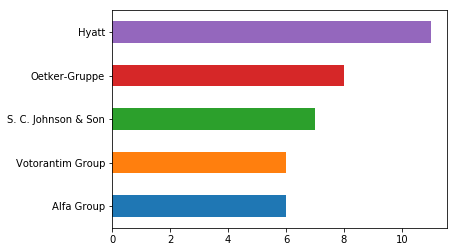

In [108]:
df.company.value_counts().head().sort_values().plot(kind='barh')

## 7) How much money do these billionaires have in total?

In [115]:
print("The total net worth of all the billionaires in the dataset is a staggering {} billion USD.".format(round(df.networthusbillion.sum())))

The total net worth of all the billionaires in the dataset is a staggering 6454.0 billion USD.


## 8) What are the top 10 countries with the most money held by billionaires?

I am **not** asking which country has the most billionaires - this is **total amount of money per country.**

> **TIP:** Think about it in steps - "I want them organized by country," "I want their net worth," "I want to add it all up," and "I want 10 of them." Just chain it all together.

In [133]:
df.groupby('countrycode').networthusbillion.sum().sort_values(ascending=False).head(10)

countrycode
USA    2322.4
RUS     422.5
DEU     401.4
CHN     375.8
FRA     235.3
HKG     213.7
BRA     192.2
IND     191.9
ITA     158.1
GBR     152.0
Name: networthusbillion, dtype: float64

In [134]:
#Let's do it by citizenship too:
df.groupby('citizenship').networthusbillion.sum().sort_values(ascending=False).head(10)

citizenship
United States     2322.4
Russia             422.5
Germany            401.4
China              375.8
France             235.3
Hong Kong          213.7
Brazil             192.2
India              191.9
Italy              158.1
United Kingdom     152.0
Name: networthusbillion, dtype: float64

## 9) How old is an average billionaire? How old are self-made billionaires  vs. non self-made billionaires? 

In [137]:
print("The average billionaire is {} years old".format(round(df.age.mean())))

The average billionaire is 63.0 years old


In [139]:
df.groupby('selfmade').age.mean()

selfmade
inherited    64.962185
self-made    62.625899
Name: age, dtype: float64

## 10) Who are the youngest billionaires? Who are the oldest? Make a graph of the distribution of ages.

> **TIP:** You use `.plot()` to graph values in a column independently, but `.hist()` to draw a [histogram](https://www.mathsisfun.com/data/histograms.html) of the distribution of their values

In [142]:
df.sort_values(by='age').head() #NB: We don't use .tail() here as sort_values defaults to ascending values for age.

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
1172,2014,Perenna Kei,1284,Hong Kong,HKG,1.3,inherited,inherited,female,24.0,...,relation,1996.0,NaN,real estate,inherited from father,NaN,http://en.wikipedia.org/wiki/Perenna_Kei,http://www.loganestate.com/en/about.aspx?ftid=294,NaN,NaN
397,2014,Dustin Moskovitz,202,United States,USA,6.8,self-made,founder non-finance,male,29.0,...,founder,2004.0,NaN,Facebook,NaN,NaN,http://en.wikipedia.org/wiki/Dustin_Moskovitz,http://www.forbes.com/profile/dustin-moskovitz/,https://www.facebook.com/facebook/info?tab=pag...,NaN
1004,2014,Mark Zuckerberg,21,United States,USA,28.5,self-made,founder non-finance,male,29.0,...,founder,2004.0,NaN,Facebook,NaN,NaN,http://www.forbes.com/profile/mark-zuckerberg/,NaN,NaN,NaN
127,2014,"Anton Kathrein, Jr.",1270,Germany,DEU,1.4,inherited,inherited,male,29.0,...,relation,1919.0,NaN,antennas,3rd generation,NaN,http://www.forbes.com/profile/anton-kathrein-jr/#,NaN,NaN,NaN
394,2014,Drew Houston,1372,United States,USA,1.2,self-made,founder non-finance,male,30.0,...,founder,2007.0,NaN,Dropbox,NaN,NaN,http://en.wikipedia.org/wiki/Drew_Houston,http://en.wikipedia.org/wiki/Dropbox_(service),http://www.forbes.com/profile/drew-houston/,NaN


In [143]:
df.sort_values(by='age', ascending=False).head()

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
343,2014,"David Rockefeller, Sr.",580,United States,USA,2.9,inherited,inherited,male,98.0,...,relation,1870.0,NaN,"oil, banking",family made most of fortune in the late 19th a...,NaN,http://en.wikipedia.org/wiki/David_Rockefeller,http://en.wikipedia.org/wiki/Standard_Oil,http://en.wikipedia.org/wiki/Rockefeller_family,NaN
816,2014,Karl Wlaschek,305,Austria,AUT,4.8,self-made,founder non-finance,male,96.0,...,founder,1953.0,NaN,retail,NaN,NaN,http://en.wikipedia.org/wiki/BILLA,http://en.wikipedia.org/wiki/Karl_Wlaschek,https://www.billa.at/Footer_Nav_Seiten/Geschic...,NaN
836,2014,Kirk Kerkorian,328,United States,USA,4.5,self-made,self-made finance,male,96.0,...,investor,1924.0,NaN,"casinos, investments",purchased in 1969,NaN,http://en.wikipedia.org/wiki/Kirk_Kerkorian,http://www.forbes.com/profile/kirk-kerkorian/,PROFILE: Las Vegas billionaire amassed his wea...,NaN
588,2014,Henry Hillman,687,United States,USA,2.5,inherited,inherited,male,95.0,...,relation,1942.0,NaN,investments,inherited from father,NaN,http://www.forbes.com/profile/henry-hillman/,http://en.wikipedia.org/wiki/Calgon_Carbon,NaN,NaN
435,2014,Erika Pohl-Stroher,1154,Germany,DEU,1.5,inherited,inherited,female,95.0,...,relation,1880.0,NaN,hair products,3rd generation,23% stake in the company,http://www.forbes.com/profile/erika-pohl-stroher/,http://en.wikipedia.org/wiki/Wella,NaN,NaN


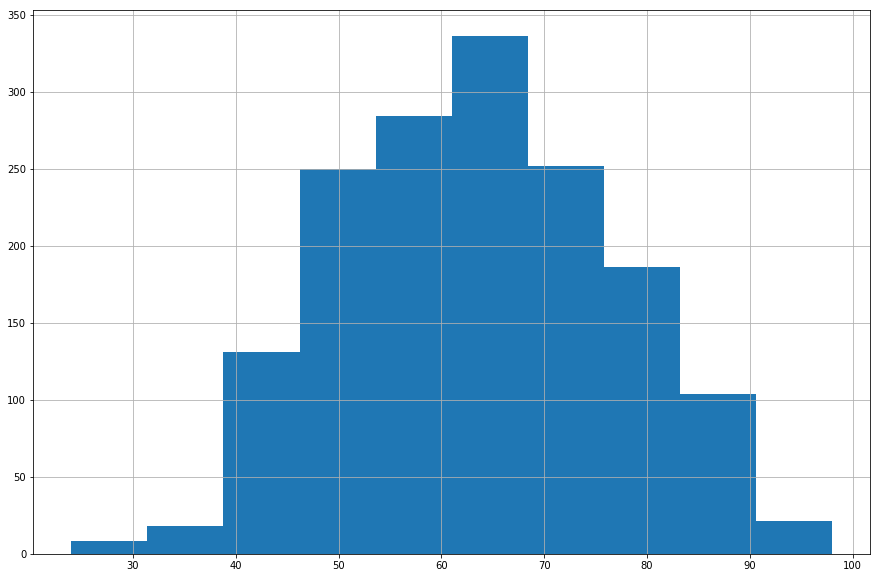

In [155]:
df.age.hist(figsize=(15,10))

## 11) Make a scatterplot of net worth compared to age

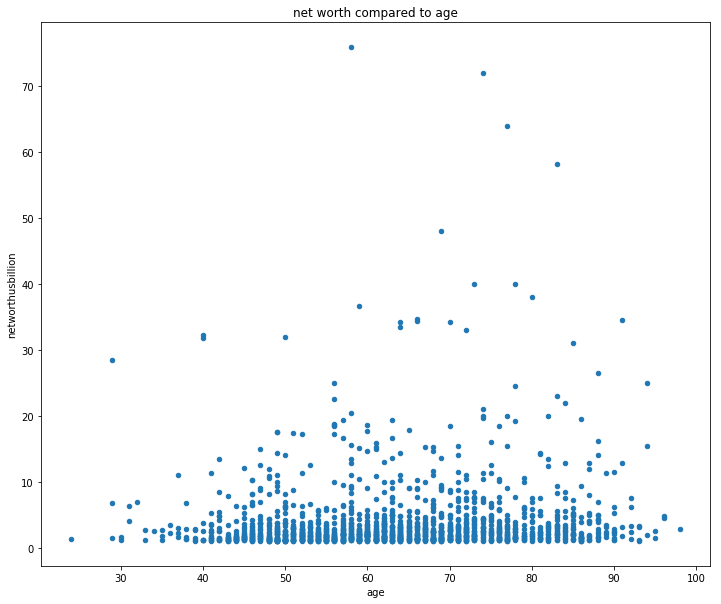

In [160]:
df.plot(kind='scatter', x='age', y='networthusbillion', title="net worth compared to age", figsize=(12,10))

## 13) Make a bar graph of the wealth of the top 10 richest billionaires

> **TIP:** When you make your plot, you'll need to set the `x` and `y` or else your chart will look _crazy_
>
> **TIP:** x and y might be the opposite of what you expect them to be

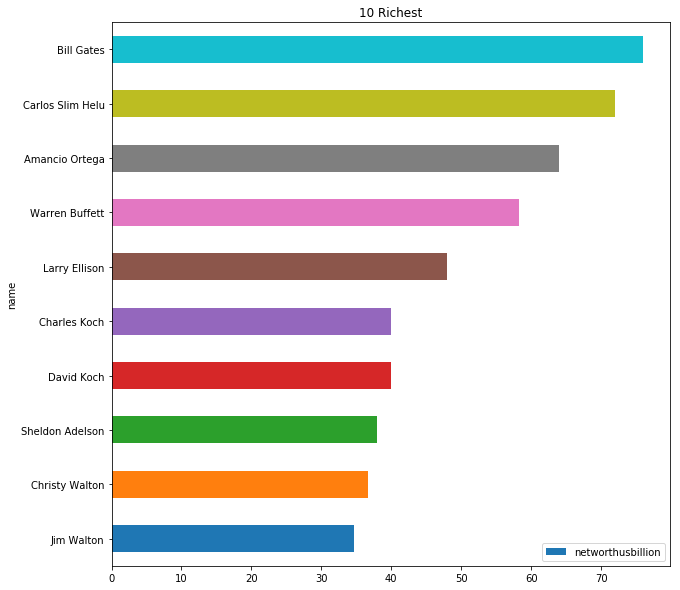

In [185]:
df.sort_values(by='networthusbillion', ascending=False).head(10).sort_values(by='networthusbillion')\
.plot(kind='barh', x='name', y='networthusbillion', figsize=(10,10), title="10 Richest")